Here, we do Support Vector Machines to classify magnetic ordering of materials using some selected Numberical and Categorical (that we turn to numerical) features.

In [ ]:
import pandas as pd

df = pd.read_csv("All_Data_Imported.csv")

#visualizing the data
print("Data Overview:")
df.head()         # First 5 rows
df.tail()         # Last 5 rows
df.sample(8)      # Random 8 rows


Data Overview:


,material_id,formula,band_gap,ordering,numberofelements,density_atomic,elements,volume,nsites,composition,...,density,symmetry,structure,efermi,cbm,vbm,formation_energy_per_atom,energy_above_hull,is_gap_direct,is_stable
33940,mp-2240191,BaNdMgCo2O5,0.0000,FM,5,15.531021,"[Element Ba, Element Co, Element Mg, Element N...",155.310213,10,Ba1 Nd1 Mg1 Co2 O5,...,5.385838,crystal_system=<CrystalSystem.ortho: 'Orthorho...,Full Formula (Ba1 Nd1 Mg1 Co2 O5)\nReduced For...,3.992601,NaN,NaN,-2.081740,0.430496,False,False
141991,mp-1209894,NdSI,2.0315,NM,3,30.932679,"[Element I, Element Nd, Element S]",742.384307,24,Nd8 S8 I8,...,5.425702,crystal_system=<CrystalSystem.ortho: 'Orthorho...,Full Formula (Nd8 S8 I8)\nReduced Formula: NdS...,5.068417,5.0682,3.0367,-2.069791,0.000000,True,True
150575,mp-1298569,KMnSn3O8,0.8739,FM,4,13.245829,"[Element K, Element Mn, Element O, Element Sn]",344.391563,26,K2 Mn2 Sn6 O16,...,5.575397,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (K2 Mn2 Sn6 O16)\nReduced Formula...,4.473531,5.3021,4.4282,-2.080681,0.000000,True,True
65399,mp-1290584,Li2V3SnO8,0.0000,FM,4,11.502421,"[Element Li, Element O, Element Sn, Element V]",322.067798,28,Li4 V6 Sn2 O16,...,4.262992,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (Li4 V6 Sn2 O16)\nReduced Formula...,4.418275,NaN,NaN,-2.408191,0.021041,False,False
15115,mp-772109,LiSiBiO4,3.1649,NM,4,11.692972,"[Element Bi, Element Li, Element O, Element Si]",327.403222,28,Li4 Si4 Bi4 O16,...,6.248607,crystal_system=<CrystalSystem.ortho: 'Orthorho...,Full Formula (Li4 Si4 Bi4 O16)\nReduced Formul...,4.207996,7.3037,4.1388,-2.495683,0.050135,True,False
3274,mp-1227514,Ca2Ga2GeO7,3.0602,NM,4,13.977693,"[Element Ca, Element Ga, Element Ge, Element O]",335.464630,24,Ca4 Ga4 Ge2 O14,...,4.001928,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Ca4 Ga4 Ge2 O14)\nReduced Formul...,1.233964,4.2864,1.2262,-2.683164,0.019780,False,False
124161,mp-866522,Ca2SnS4,1.0654,NM,3,24.438336,"[Element Ca, Element S, Element Sn]",171.068353,7,Ca2 Sn1 S4,...,3.175371,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Ca2 Sn1 S4)\nReduced Formula: Ca...,3.153235,4.0933,3.0279,-1.530812,0.147505,True,False
131906,mp-26875,Li2CuPO4,1.5925,NM,4,10.808120,"[Element Cu, Element Li, Element O, Element P]",345.859844,32,Li8 Cu4 P4 O16,...,3.310889,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Li8 Cu4 P4 O16)\nReduced Formula...,3.856843,5.3648,3.7723,-2.290354,0.065772,False,False


Number of materials in each magnetic ordering class:
NM: 83355
FM: 56688
FiM: 11345
AFM: 3415


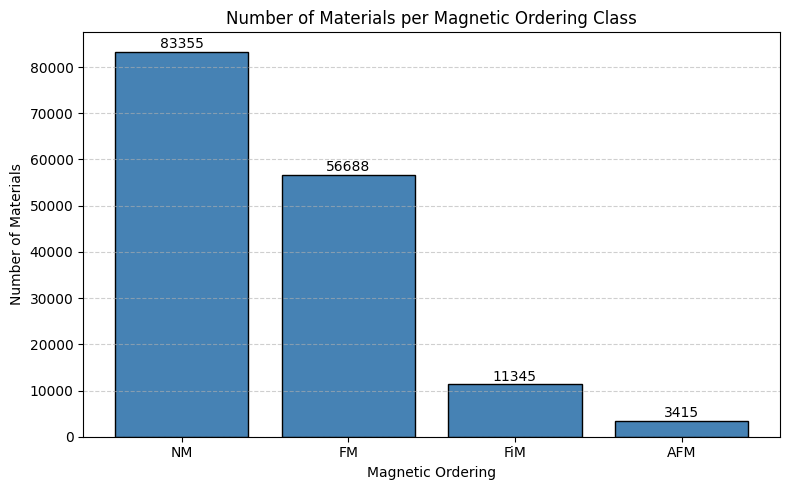

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("All_Data_Imported.csv")

# Drop missing 'ordering' labels
df = df.dropna(subset=["ordering"])

# Count number of materials per class
ordering_counts = df["ordering"].value_counts().sort_values(ascending=False)

# Print counts
print("Number of materials in each magnetic ordering class:")
for ordering, count in ordering_counts.items():
    print(f"{ordering}: {count}")

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(ordering_counts.index, ordering_counts.values, color="steelblue", edgecolor="black")

# Add text labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title("Number of Materials per Magnetic Ordering Class")
plt.xlabel("Magnetic Ordering")
plt.ylabel("Number of Materials")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


The data set is imbalanced. There are much more Non-magnetic materials than say antiferromagnets.

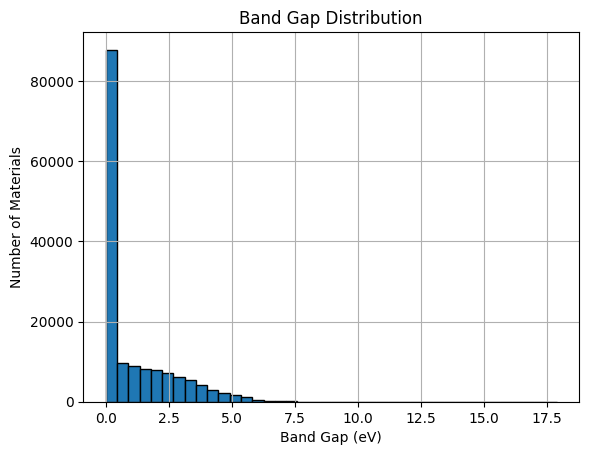

In [3]:
#Band Gap Distribution across all materials
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("All_Data_Imported.csv")


df["band_gap"].hist(bins=40, edgecolor='black')
plt.xlabel("Band Gap (eV)")
plt.ylabel("Number of Materials")
plt.title("Band Gap Distribution")
plt.show()

Most of the materials have small band gaps.

/var/folders/__/0svk_nfx651g4xtlfd1l7q9r0000gn/T/ipykernel_54572/3425186599.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="ordering", y="band_gap", palette="Set3")


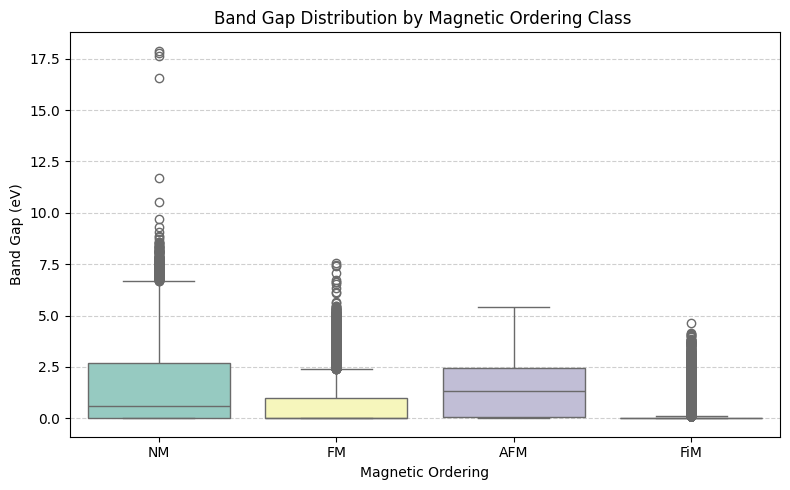

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("All_Data_Imported.csv")

# Drop rows with missing values in required columns
df = df.dropna(subset=["band_gap", "ordering"])

# Filter only the 4 main classes
valid_classes = ["NM", "AFM", "FM", "FiM"]
df_filtered = df[df["ordering"].isin(valid_classes)]

# Plot boxplot of band_gap for each original magnetic class
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x="ordering", y="band_gap", palette="Set3")

plt.title("Band Gap Distribution by Magnetic Ordering Class ")
plt.xlabel("Magnetic Ordering")
plt.ylabel("Band Gap (eV)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


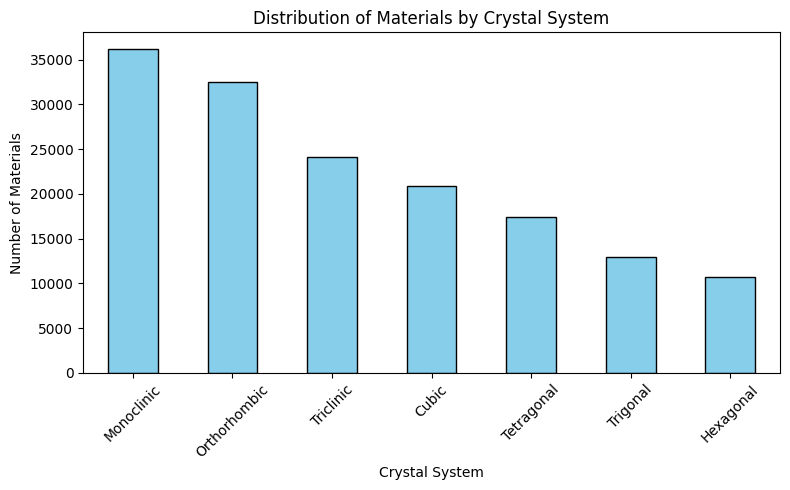

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re



# Correct crystal system parser
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

# Apply extraction
df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# Count and plot
counts = df["crystal_system"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Materials by Crystal System")
plt.xlabel("Crystal System")
plt.ylabel("Number of Materials")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/__/0svk_nfx651g4xtlfd1l7q9r0000gn/T/ipykernel_54572/3156403383.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="ordering", y="density_atomic", palette="Set2")


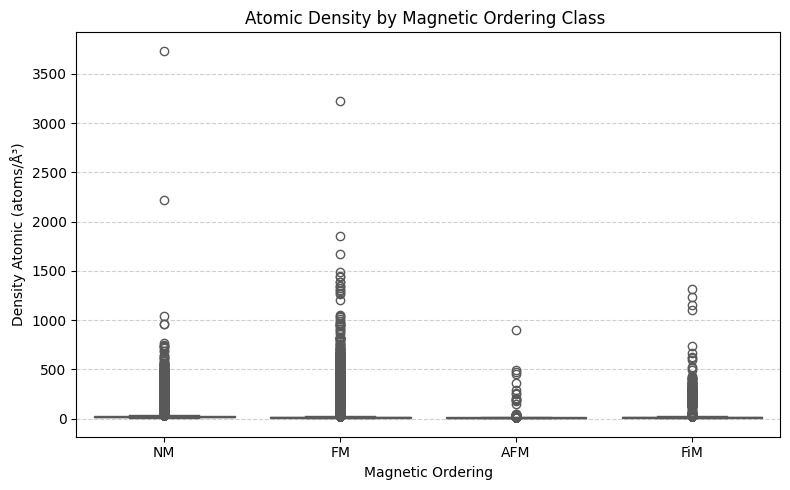

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("All_Data_Imported.csv")

# Drop rows with missing values in required columns
df = df.dropna(subset=["density_atomic", "ordering"])

# Filter only the 4 main classes
valid_classes = ["NM", "AFM", "FM", "FiM"]
df_filtered = df[df["ordering"].isin(valid_classes)]

# Plot boxplot of density_atomic for each original magnetic class
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x="ordering", y="density_atomic", palette="Set2")

plt.title("Atomic Density by Magnetic Ordering Class ")
plt.xlabel("Magnetic Ordering")
plt.ylabel("Density Atomic (atoms/Å³)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


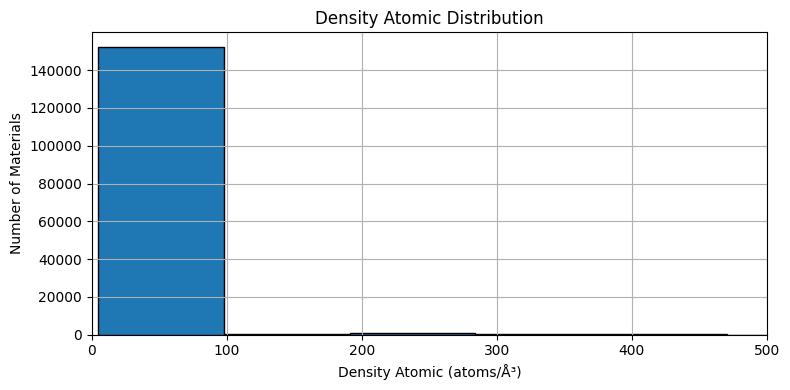

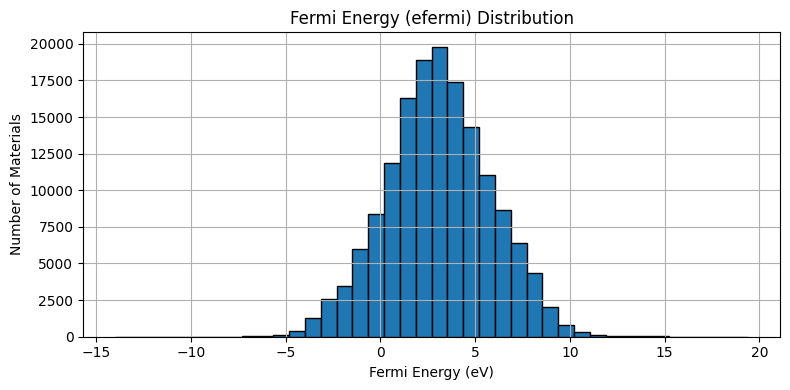

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("All_Data_Imported.csv")

# === Plot 1: Density Atomic Distribution ===
plt.figure(figsize=(8, 4))
df["density_atomic"].dropna().hist(bins=40, edgecolor='black')
plt.xlim(0, 500)  # Restrict x-axis range
plt.xlabel("Density Atomic (atoms/Å³)")
plt.ylabel("Number of Materials")
plt.title("Density Atomic Distribution")
plt.tight_layout()
plt.show()

# === Plot 2: Fermi Energy (efermi) Distribution ===
plt.figure(figsize=(8, 4))
df["efermi"].dropna().hist(bins=40, edgecolor='black')
plt.xlabel("Fermi Energy (eV)")
plt.ylabel("Number of Materials")
plt.title("Fermi Energy (efermi) Distribution")
plt.tight_layout()
plt.show()


Now, we do SVM on selected features.

First, without Categorical features to compare.

Train size: 53559, Validation size: 17854, Test size: 17854
4-fold Stratified CV (F1_macro) scores on training set: [0.45788992 0.46054276 0.45340259 0.45942885]
Mean CV F1_macro: 0.457816029182996
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.13      0.72      0.22       554
          FM       0.69      0.38      0.49      6404
         FiM       0.19      0.62      0.29       865
          NM       0.92      0.78      0.84     10031

    accuracy                           0.62     17854
   macro avg       0.48      0.62      0.46     17854
weighted avg       0.78      0.62      0.67     17854



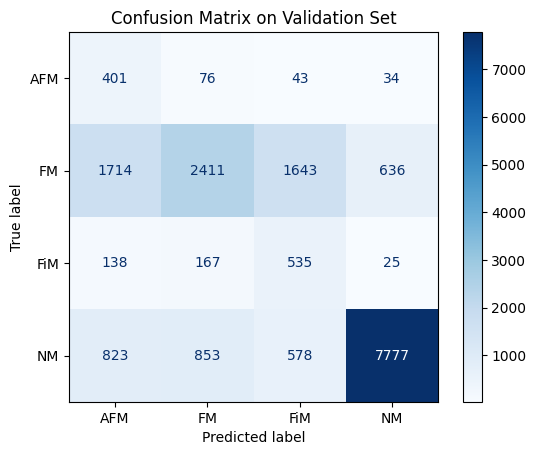

In [ ]:
#Without Categorical features.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("All_Data_Imported.csv")


# === 2. drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom"]


df = df.dropna(subset=numerical_features  + ["ordering"])



# === 3. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
], axis=1)

# === 4. Encode labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# === 5. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 6. Define SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma="scale", class_weight="balanced"))
])

# === 7. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 8. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 9. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# === 10. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


Since there are very few Antiferromagnets and Ferrimagnets, the model learns very little about them, hence the small precision.

Now we add Categorical features. Each material is composed of elements, so we do one-hot encoding to label whether that material has that elements or not.

Train size: 53559, Validation size: 17854, Test size: 17854
4-fold Stratified CV (F1_macro) scores on training set: [0.58713879 0.58748226 0.59761256 0.59682986]
Mean CV F1_macro: 0.5922658683669729
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.23      0.63      0.34       554
          FM       0.81      0.67      0.73      6404
         FiM       0.31      0.48      0.38       865
          NM       0.97      0.94      0.95     10031

    accuracy                           0.81     17854
   macro avg       0.58      0.68      0.60     17854
weighted avg       0.86      0.81      0.83     17854



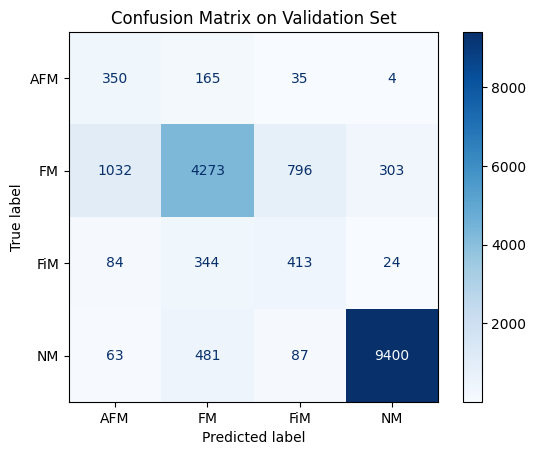

In [ ]:
#With Categorical Variables. "Elements" is one-hot encoded using MultiLabelBinarizer(). "Crystal_system" is label encoded using LabelEncoder

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import re

# === 1. Load dataset ===
df = pd.read_csv("All_Data_Imported.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3.1 Extract 'crystal_system' from 'symmetry' column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 3.2 Label encode 'crystal_system' ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 4.drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 5. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 6. One-hot encode other categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 7. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 8. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# === 9. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 10. Define SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma="scale", class_weight="balanced"))
])

# === 11. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 12. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 13. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# === 14. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


With the addition of Categorical variables, the precision is slightly higher. We need to increase the data set for AFM for the model to learn better, for that we use SMOTE later on.

Now, we hyperparameter tuning using GridSearchCV.

Train size: 53559, Validation size: 17854, Test size: 17854
Best parameters: {'svm__C': 10, 'svm__gamma': 0.01}
Best f1_macro score: 0.5950063023178689
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.23      0.63      0.34       554
          FM       0.81      0.67      0.73      6404
         FiM       0.31      0.47      0.37       865
          NM       0.97      0.94      0.95     10031

    accuracy                           0.81     17854
   macro avg       0.58      0.68      0.60     17854
weighted avg       0.86      0.81      0.83     17854



TypeError: 'value' must be an instance of str or bytes, not a float

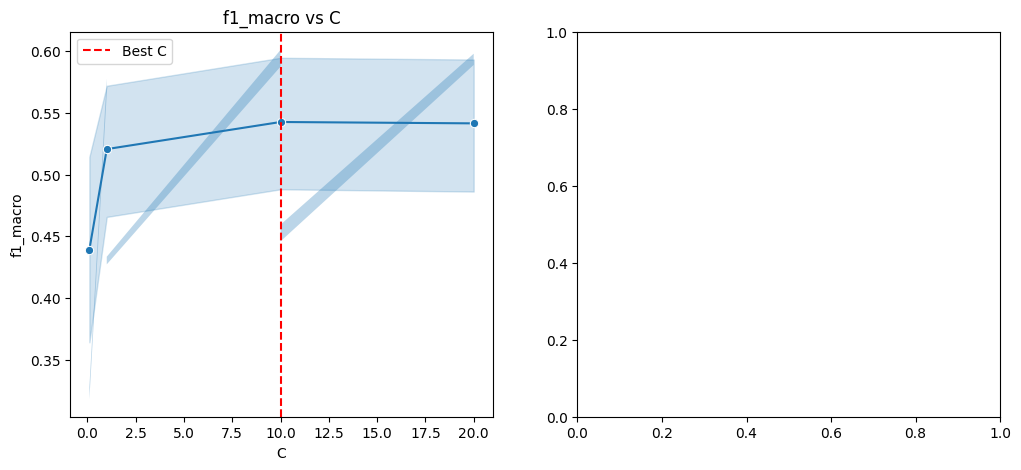

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# === 1. Load dataset ===
df = pd.read_csv("All_Data_Imported.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3.1 Extract 'crystal_system' from 'symmetry' column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 3.2 Label encode 'crystal_system' ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])


# === 5. Filter and drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Define Pipeline and Param Grid (RBF only) ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", class_weight="balanced"))
])

param_grid = {
    "svm__C": [0.1, 1, 10, 20],
    "svm__gamma": ["scale", 0.01, 0.1, 0.5]
}

grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    scoring="f1_macro",
    cv=4,
    return_train_score=True,
    n_jobs=-1
)

# === 12. Fit GridSearch ===
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best f1_macro score:", grid_search.best_score_)

# === 13. Evaluate on Validation Set ===
y_val_pred = grid_search.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# === 14. Plot f1_macro vs C and gamma ===
results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12, 5))

# --- Plot 1: f1_macro vs C ---
plt.subplot(1, 2, 1)
sns.lineplot(x="param_svm__C", y="mean_test_score", data=results_df, marker="o")
plt.fill_between(
    results_df["param_svm__C"].astype(float),
    results_df["mean_test_score"] - results_df["std_test_score"],
    results_df["mean_test_score"] + results_df["std_test_score"],
    alpha=0.3
)
plt.axvline(grid_search.best_params_["svm__C"], color="red", linestyle="--", label="Best C")
plt.title("f1_macro vs C")
plt.xlabel("C")
plt.ylabel("f1_macro")
plt.legend()

# --- Plot 2: f1_macro vs gamma ---
plt.subplot(1, 2, 2)
gamma_df = results_df[results_df["param_svm__C"] == grid_search.best_params_["svm__C"]]
sns.lineplot(x="param_svm__gamma", y="mean_test_score", data=gamma_df, marker="o")
plt.fill_between(
    gamma_df["param_svm__gamma"].astype(str),
    gamma_df["mean_test_score"] - gamma_df["std_test_score"],
    gamma_df["mean_test_score"] + gamma_df["std_test_score"],
    alpha=0.3
)
plt.axvline(str(grid_search.best_params_["svm__gamma"]), color="red", linestyle="--", label="Best gamma")
plt.title("f1_macro vs Gamma (C fixed)")
plt.xlabel("Gamma")
plt.ylabel("f1_macro")
plt.legend()

plt.tight_layout()
plt.show()


We plot the result below.

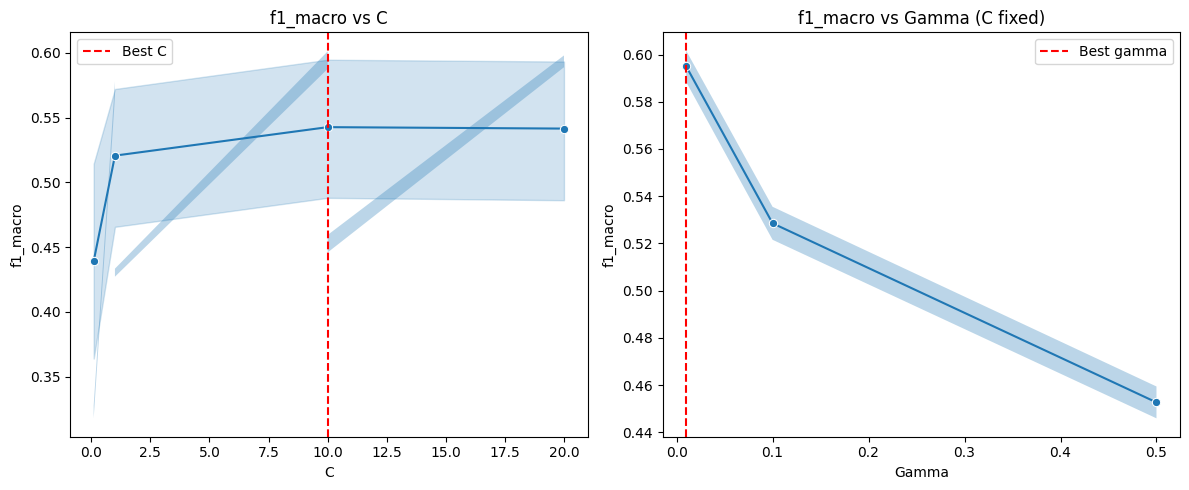

In [8]:
# === 14. Plot f1_macro vs C and gamma (excluding 'scale' for gamma plot) ===
results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12, 5))

# --- Plot 1: f1_macro vs C ---
plt.subplot(1, 2, 1)
sns.lineplot(
    x="param_svm__C",
    y="mean_test_score",
    data=results_df,
    marker="o"
)
plt.fill_between(
    results_df["param_svm__C"].astype(float),
    results_df["mean_test_score"] - results_df["std_test_score"],
    results_df["mean_test_score"] + results_df["std_test_score"],
    alpha=0.3
)
plt.axvline(grid_search.best_params_["svm__C"], color="red", linestyle="--", label="Best C")
plt.title("f1_macro vs C")
plt.xlabel("C")
plt.ylabel("f1_macro")
plt.legend()

# --- Plot 2: f1_macro vs gamma (only numeric gammas) ---
plt.subplot(1, 2, 2)

# Filter: same C as best, exclude gamma='scale' 
gamma_df = results_df[
    (results_df["param_svm__C"] == grid_search.best_params_["svm__C"]) &
    (results_df["param_svm__gamma"].apply(lambda x: isinstance(x, float) or isinstance(x, int)))
]

sns.lineplot(
    x="param_svm__gamma",
    y="mean_test_score",
    data=gamma_df,
    marker="o"
)
plt.fill_between(
    gamma_df["param_svm__gamma"].astype(float),
    gamma_df["mean_test_score"] - gamma_df["std_test_score"],
    gamma_df["mean_test_score"] + gamma_df["std_test_score"],
    alpha=0.3
)
plt.axvline(grid_search.best_params_["svm__gamma"] if isinstance(grid_search.best_params_["svm__gamma"], float) else None,
            color="red", linestyle="--", label="Best gamma")
plt.title("f1_macro vs Gamma (C fixed)")
plt.xlabel("Gamma")
plt.ylabel("f1_macro")
plt.legend()

plt.tight_layout()
plt.show()


We see that among the parameters selected C=10, gamma=0.01 has the best score. Now we do hyperparameter tuning for C near C=10 with fixed gamma and kernel.

Best parameters: {'svm__C': 10}
Best f1_macro score: 0.5950063023178689
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.23      0.63      0.34       554
          FM       0.81      0.67      0.73      6404
         FiM       0.31      0.47      0.37       865
          NM       0.97      0.94      0.95     10031

    accuracy                           0.81     17854
   macro avg       0.58      0.68      0.60     17854
weighted avg       0.86      0.81      0.83     17854



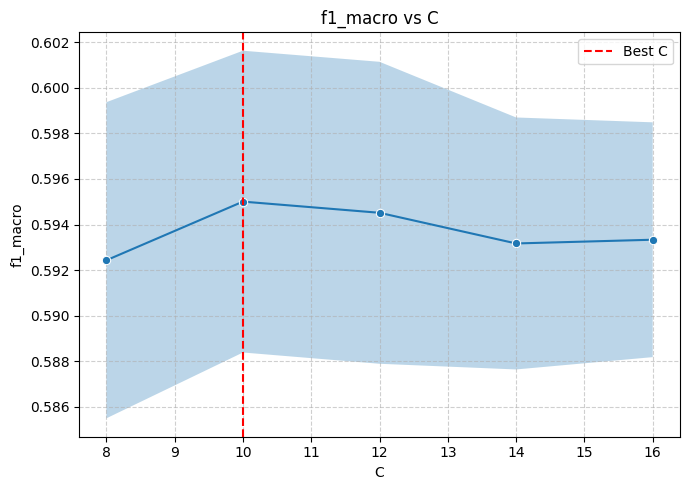

In [17]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# === 1. Load dataset ===
df = pd.read_csv("All_Data_Imported.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]
df["elements"] = df["elements"].apply(parse_elements)

# === 3. Extract crystal_system ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"
df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 4. Label encode crystal_system ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 5. Drop NA and define features ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]
df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode other categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# === 11. SVM pipeline and hyperparameter grid ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", gamma=0.01, class_weight="balanced"))
])

param_grid = {
    "svm__C": [8, 10, 12, 14, 16]
}

grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    scoring="f1_macro",
    cv=4,
    return_train_score=True,
    n_jobs=-1
)

# === 12. Run GridSearch ===
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best f1_macro score:", grid_search.best_score_)

# === 13. Evaluate on Validation Set ===
y_val_pred = grid_search.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# === 14. Plot f1_macro vs C ===
results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(7, 5))
sns.lineplot(x="param_svm__C", y="mean_test_score", data=results_df, marker="o")

plt.fill_between(
    results_df["param_svm__C"].astype(float),
    results_df["mean_test_score"] - results_df["std_test_score"],
    results_df["mean_test_score"] + results_df["std_test_score"],
    alpha=0.3
)

plt.axvline(grid_search.best_params_["svm__C"], color="red", linestyle="--", label="Best C")
plt.title("f1_macro vs C")
plt.xlabel("C")
plt.ylabel("f1_macro")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Best parameters are C=10 and gamma=0.01. Now we do SMOTE to increase the number of AFM in the training set. 

In [19]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 3.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

Train size: 53559, Validation size: 17854, Test size: 17854
Number of AFM samples after SMOTE in training set: 30089
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.30      0.33      0.31       554
          FM       0.80      0.82      0.81      6404
         FiM       0.40      0.30      0.35       865
          NM       0.95      0.94      0.95     10031

    accuracy                           0.85     17854
   macro avg       0.61      0.60      0.60     17854
weighted avg       0.85      0.85      0.85     17854



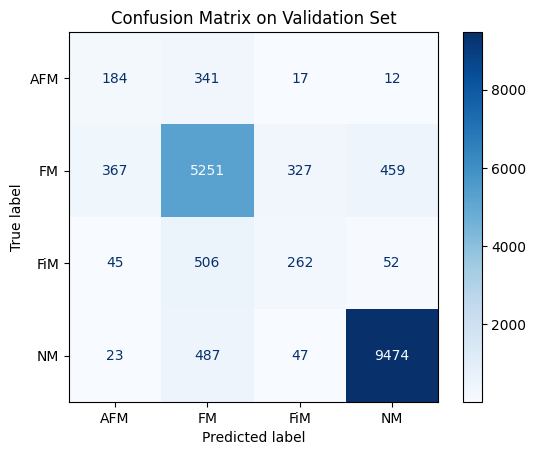

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# === 1. Load dataset ===
df = pd.read_csv("All_Data_Imported.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]
df["elements"] = df["elements"].apply(parse_elements)

# === 3. Extract crystal_system from symmetry ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"
df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 4. Label encode crystal_system ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 5. Drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Define pipeline with SMOTE and fixed SVM parameters ===
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('svm', SVC(C=10, gamma=0.01, kernel='rbf', class_weight='balanced'))
])

# === 12. Fit on training data ===
pipeline.fit(X_train, y_train)

# Extract the SMOTE step and transform X_train
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Get the AFM class index from label encoder
afm_index = list(le.classes_).index("AFM")
num_afm_after_smote = np.sum(y_train_resampled == afm_index)
print(f"Number of AFM samples after SMOTE in training set: {num_afm_after_smote}")

# === 13. Predict on validation set ===
y_val_pred = pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# === 14. Confusion Matrix on Validation Set ===
cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=le.classes_)
disp_val.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()

